In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [41]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
# randomly sample the data
 rng = np.random.RandomState(rseed)
 X = rng.rand(N, 1) ** 2
 y = 10 - 1. / (X.ravel() + 0.1)
 if err > 0:
     y += err * rng.randn(N)
 return X, y

X, y = make_data(40)

print(X)
print(y)


[[1.73907352e-01]
 [5.18867376e-01]
 [1.30815988e-08]
 [9.14049845e-02]
 [2.15372915e-02]
 [8.52641608e-03]
 [3.46928663e-02]
 [1.19412216e-01]
 [1.57424429e-01]
 [2.90323473e-01]
 [1.75724041e-01]
 [4.69525764e-01]
 [4.18007224e-02]
 [7.71090232e-01]
 [7.50080261e-04]
 [4.49526682e-01]
 [1.74143298e-01]
 [3.12134324e-01]
 [1.97084925e-02]
 [3.92442000e-02]
 [6.41191864e-01]
 [9.37530479e-01]
 [9.82347155e-02]
 [4.79310604e-01]
 [7.68057946e-01]
 [8.00321082e-01]
 [7.23251789e-03]
 [1.52527609e-03]
 [2.88423714e-02]
 [7.71134256e-01]
 [9.67209972e-03]
 [1.77331632e-01]
 [9.17552352e-01]
 [2.84265221e-01]
 [4.78693941e-01]
 [9.95501134e-02]
 [4.71283524e-01]
 [6.96600012e-01]
 [3.34461088e-04]
 [5.62716493e-01]]
[ 7.24998644  7.70041705 -0.12288892  3.83970623  1.50418461  1.31600899
  1.88404109  5.0456151   5.42819209  6.59281674  5.70193919  8.23148858
  1.8305394   9.086429    1.73425177  8.92229631  6.16043712  6.68597765
  0.8992155   4.51082693  8.70162943  8.39917725  5.14639037

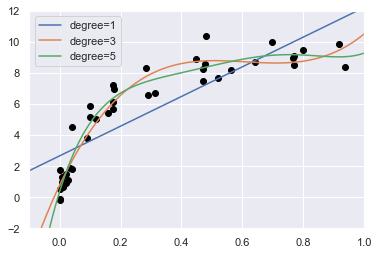

In [35]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test, y_test, label='degree={0}'.format(degree))
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc='best');

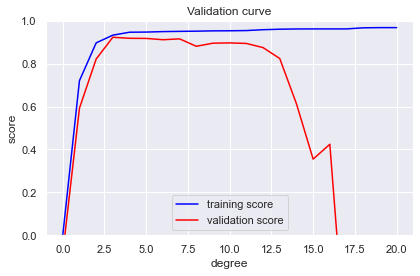

In [59]:

from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
import sklearn.metrics
degree_range = np.arange(0, 21)


train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(), LinearRegression()), 
                                          X, y,
                                          param_name="polynomialfeatures__degree",
                                          param_range=degree_range,
                             b             scoring='r2',
                                          n_jobs=-1,
                                          cv=7)

plt.plot(degree_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

plt.title('Validation curve')
plt.tight_layout()


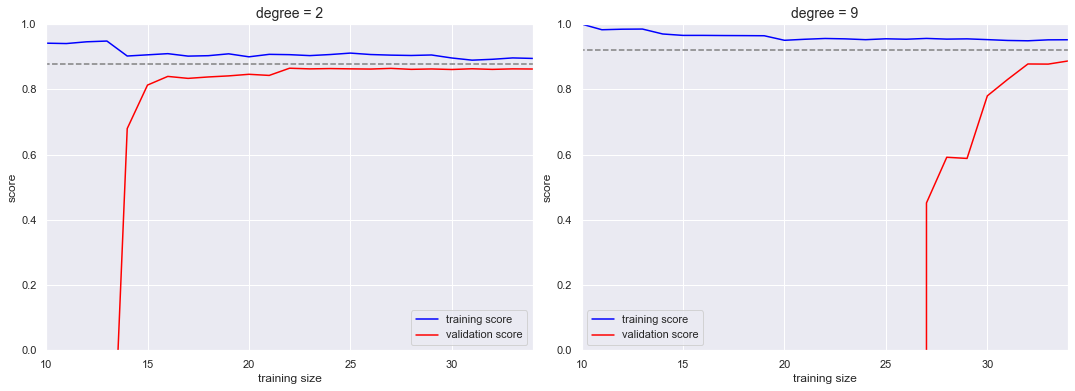

In [96]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), 
                                            X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), 
                 N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')